This preprocessing and exploratory data analysis was developed to assist and direct a beginner group member's advancement. The post-exploratory data analysis steps were completed using Orange.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

## Creating Subsets
This cell generates subsets from `kaggleDS.csv`. Rows are grouped based on their specific genre classification to facilitate targeted exploratory data analysis.

In [5]:
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/DataSets/kaggleDS.csv")
df["track_genre"].value_counts()
subset_mpb = df.loc[df["track_genre"] == "mpb"]
subset_metal = df.loc[df["track_genre"] == "death-metal"]
subset_classical_rock = df.loc[df["track_genre"] == "rock"]
subsets = pd.concat([subset_mpb,subset_classical_rock,subset_metal], ignore_index=True)


subset_mpb.to_csv("MPB.csv")
subset_metal.to_csv("DEATH_METAL.csv")
subset_classical_rock.to_csv("ROCK.csv")

subsets["track_genre"].value_counts()



3000

## Genarating Normal Distribution Graphs

This cell defines `generatingNormalDistributionGraphs` to visualize the distribution of numerical features within a data subset, overlaying a normal distribution curve.
- It takes a `subset` (DataFrame) and `observed_class` (string for titles).
- The function iterates through each column: plotting a histogram with KDE,
calculating mean/std, and then plotting a normal distribution curve.
- Each subplot gets a title, labels, legend, and grid. Unused subplots are removed.
- A main title is added to the figure, and layout adjusted.
- The function is then called three times with a slice of `subset_mpb`
(columns 5 to 19) for "MPB", "CLASSICAL ROCK", and "DEATH METAL" genres.

In [83]:
def generatingNormalDistributionGraphs(subset, observed_class):
    columns = subset.columns
    num_columns = len(columns)
    cols = 3  
    rows = (num_columns + cols - 1) // cols  

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(subset[column], kde=True, stat="density", bins=30, color="skyblue", label="Data", ax=ax)
        
        mean = subset[column].mean()
        std = subset[column].std()
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, std)
        ax.plot(x, p, "r", label="Normal Curve")

        ax.set_title(f"{column} ({observed_class})")
        ax.set_xlabel(column)
        ax.set_ylabel("Density")
        ax.legend()
        ax.grid(True)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    fig.suptitle(f"Normal Distribution Graphs for {observed_class}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


generatingNormalDistributionGraphs(subset_mpb.iloc[:, 5:20], "MPB")
generatingNormalDistributionGraphs(subset_mpb.iloc[:, 5:20], "CLASSICAL ROCK")
generatingNormalDistributionGraphs(subset_mpb.iloc[:, 5:20], "DEATH METAL")


## Plotting Attributes by Genre

This cell defines `plot_attributes_by_genre` to compare numerical feature distributions across genres.
- It takes three genre-specific DataFrames (`subset_mpb`, `subset_rock`, `subset_metal`) and a `columns` list (features to plot).
- The function iterates through each feature and genre, plotting a histogram with KDE and overlaying a normal distribution curve (calculated from the feature's mean and std within that genre).
- Each subplot is clearly titled with the feature and genre, and includes labels, legend, and grid. A main title is added, and layout adjusted for clarity.
- The function is then called to plot features from `subset_mpb.columns[5:20]` for MPB, Classical Rock, and Death Metal genres.

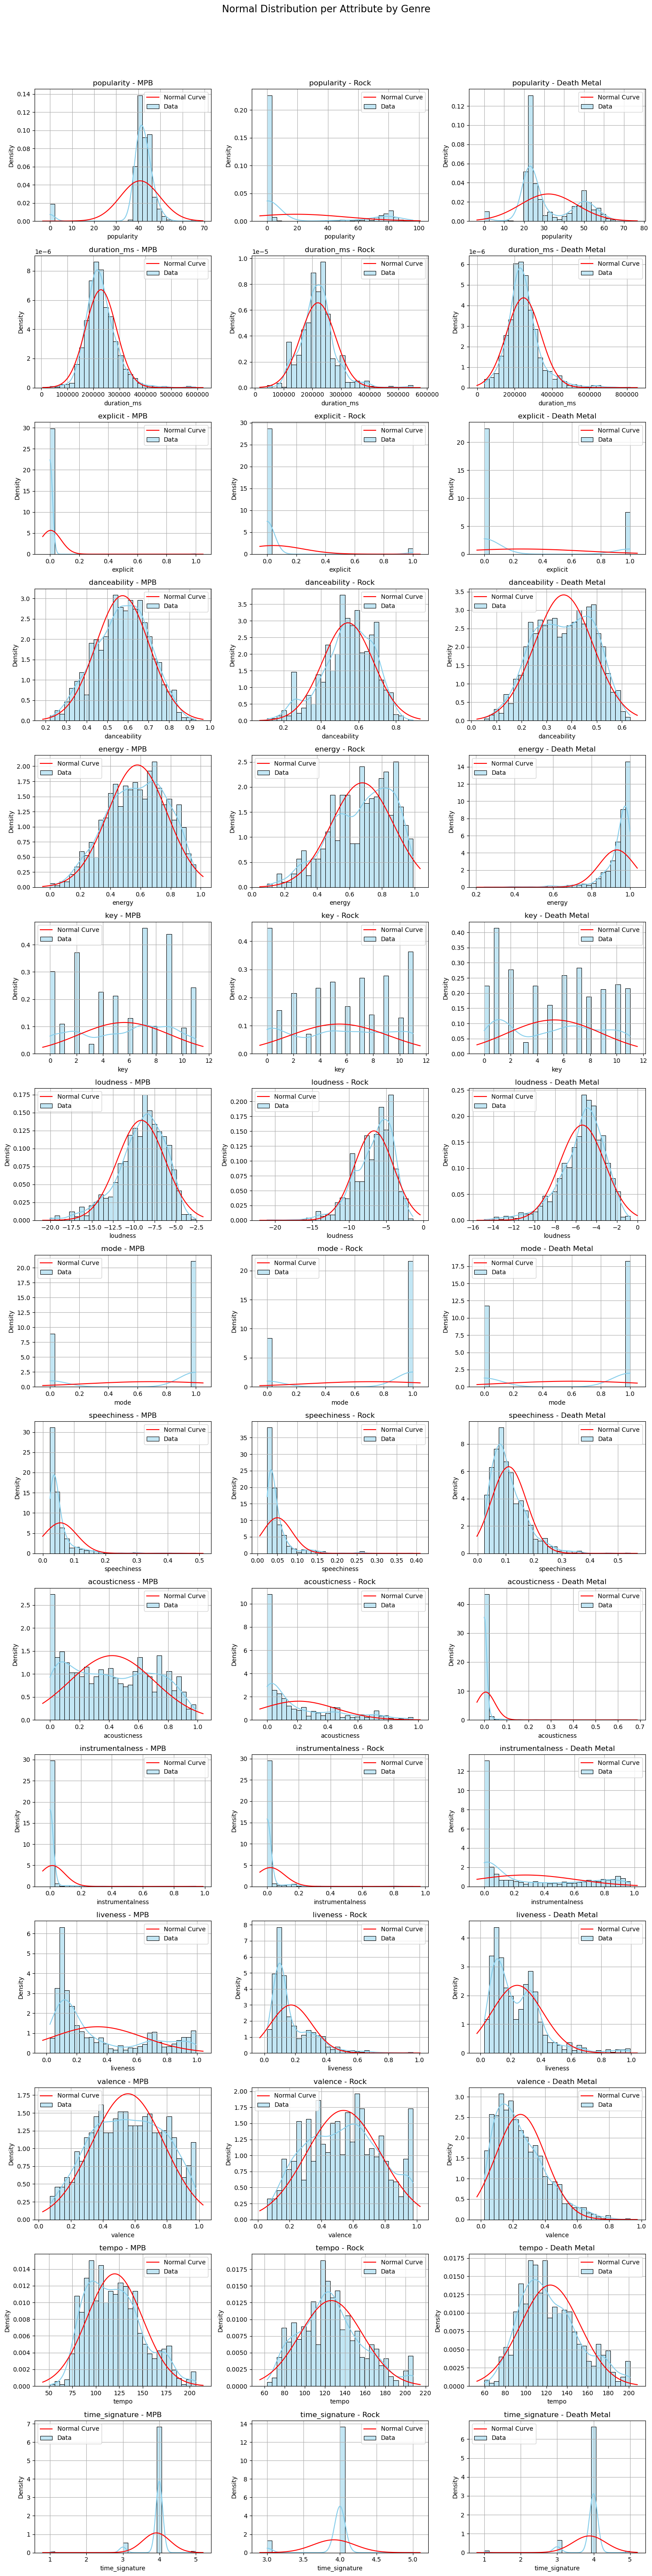

In [81]:


def plot_attributes_by_genre(subset_mpb, subset_rock, subset_metal, columns):
    genres = {
        "MPB": subset_mpb,
        "Rock": subset_rock,
        "Death Metal": subset_metal
    }

    rows = len(columns)
    cols = len(genres)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    
    if rows == 1:
        axes = np.array([axes])  # Ensure axes is 2D

    for i, column in enumerate(columns):
        for j, (genre_name, data) in enumerate(genres.items()):
            ax = axes[i][j]
            sns.histplot(data[column], kde=True, stat="density", bins=30, color="skyblue", label="Data", ax=ax)

            mean = data[column].mean()
            std = data[column].std()
            xmin, xmax = ax.get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mean, std)
            ax.plot(x, p, "r", label="Normal Curve")

            ax.set_title(f"{column} - {genre_name}")
            ax.set_xlabel(column)
            ax.set_ylabel("Density")
            ax.legend()
            ax.grid(True)

    fig.suptitle("Normal Distribution per Attribute by Genre", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Usage:
columns_to_plot = subset_mpb.columns[5:20]  # adjust this if needed
plot_attributes_by_genre(subset_mpb, subset_classical_rock, subset_metal, columns_to_plot)
